In [53]:
#Import all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [ ]:
#Read the dataset

df = pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [ ]:
#Print the information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
#Prepare the data

X = df.drop(['class'],axis=1)
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [ ]:
#Prepare the target

y = df['class']
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [ ]:
#Encode the data and target

oe = OrdinalEncoder(dtype=np.int)
le = LabelEncoder()

X_encoded = np.array(oe.fit_transform(X))
y_encoded = np.array(le.fit_transform(y))

In [ ]:
#Build a list of data and target again for inspecting

X_y_encoded = np.hstack([y_encoded.reshape(-1,1), X_encoded])
X_y_encoded

array([[1, 5, 2, ..., 2, 3, 5],
       [0, 5, 2, ..., 3, 2, 1],
       [0, 0, 2, ..., 3, 2, 3],
       ...,
       [0, 2, 2, ..., 0, 1, 2],
       [1, 3, 3, ..., 7, 4, 2],
       [0, 5, 2, ..., 4, 1, 2]])

In [ ]:
#Build the dataframe of the encoded data so it will be easier to inspect it

df_2 = pd.DataFrame(X_y_encoded, columns=df.columns)
df_2

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


In [ ]:
#Print the description of the data, it's found out that the veil-type column 
#just have 1 unique value, consider to drop it

df_2.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [ ]:
#Drop the veil-type column

df_2.drop(['veil-type'], axis =1, inplace=True)
df_2

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,2,1,0,7,4,2


In [ ]:
#Split the data into 80% of train and 20% of test

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, train_size=0.8, random_state=23)

In [ ]:
#Fit the RandomForestClassifier Model with dataset

model = RandomForestClassifier()
model.fit(X_train, y_train)
X_train_predicted = model.predict(X_train)
print('Accuracy score for train data is: ', accuracy_score(y_train, 
                                                          X_train_predicted))

Accuracy score for train data is:  1.0


In [ ]:
#Print the accuracy score of the test data

y_predicted = model.predict(X_test)
print('Accuracy score for test data is: ', accuracy_score(y_test, 
                                                          y_predicted))

Accuracy score for test data is:  1.0


In [ ]:
#Print the classification report

print(classification_report(y_test, y_predicted, target_names=le.classes_))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       861
           p       1.00      1.00      1.00       764

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Text(0.5, 1.0, 'Confusion Matrix of Mushrooms Classification using\nRandom Forest Classifier\n Excluded veil-type')

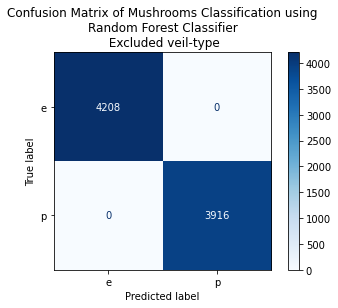

In [ ]:
#Display the confusion matrix

disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_encoded,
        y_encoded,
        display_labels=le.classes_,
        cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix of Mushrooms Classification using'+ 
                   '\nRandom Forest Classifier\n Excluded veil-type')

### Take a Look of the Correlation each Features

In [ ]:
#Print the Correlation Map

df_corr = df_2.corr()
df_corr

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,-0.102019,-0.379361,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,0.030191,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,-0.126245,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,0.321274,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,0.244188,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,-0.205215,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,0.144063,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,0.350548,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,-0.344345,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,0.315080,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


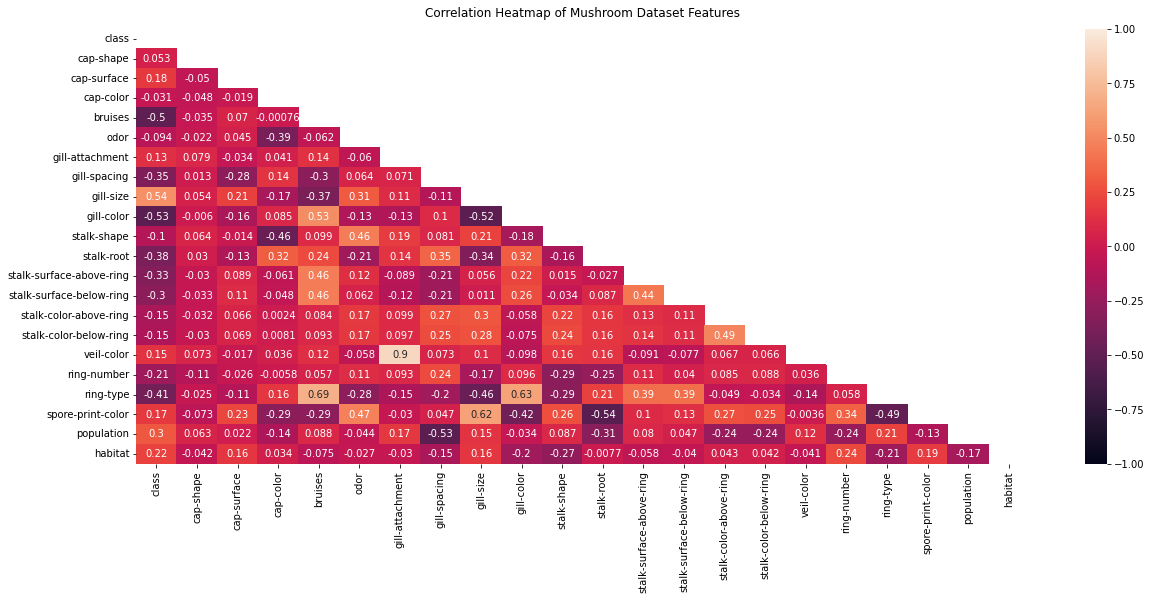

In [ ]:
#Plot the Correlation Map using Heat Map

plt.figure(figsize=(20, 8))

mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
heatmap = sns.heatmap(df_corr, vmin=-1, vmax=1, mask=mask, annot=True)
heatmap.set_title('Correlation Heatmap of Mushroom Dataset Features', 
                  fontdict={'fontsize':12}, pad=12);

Text(0.5, 1.0, 'Features Correlating with Class')

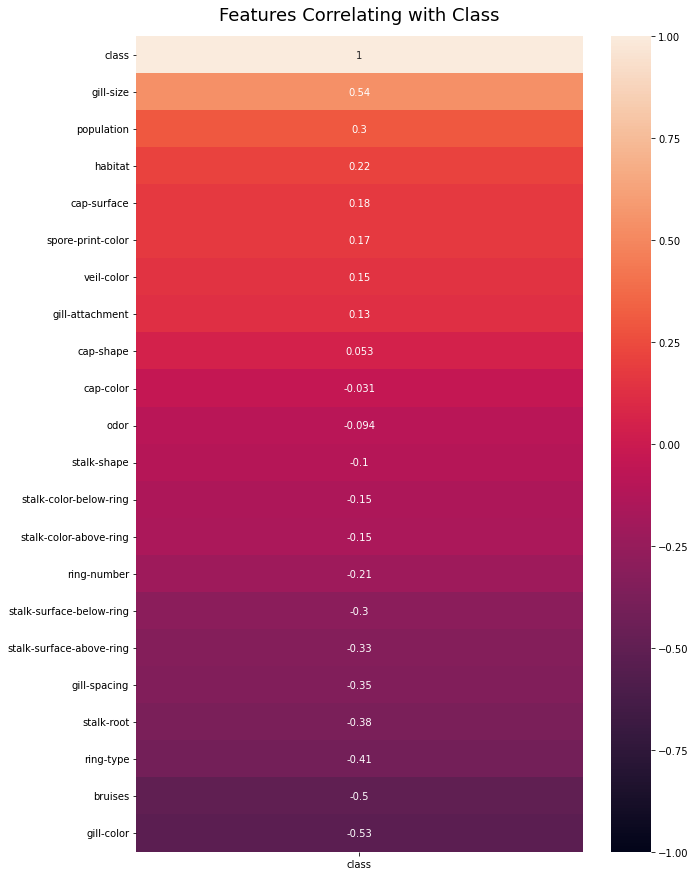

In [ ]:
#Inspect the Features that Correlating with Class

plt.figure(figsize=(10, 15))
heatmap = sns.heatmap(df_corr[['class']].sort_values(by='class', 
                                                     ascending=False), 
                      vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Class', 
                  fontdict={'fontsize':18}, pad=16)

In [ ]:
#Function for decide the correlate column

def correlate_column(corr_num = float):
  column = []

  for i in range(len(df_corr['class'])):
    if df_corr['class'][i] > corr_num or df_corr['class'][i] < -(corr_num):
      column.append(df_corr.index[i])
  return column

##### We will try to train using > 0.5 or < -0.5 Correlate to Class

In [ ]:
#Take the column that has correlate value > 0.5 or < -0.5

df_3 = df_2[correlate_column(0.5)]
df_3

,class,bruises,gill-size,gill-color
0,1,1,1,4
1,0,1,0,4
2,0,1,0,5
3,1,1,1,5
4,0,0,0,4
...,...,...,...,...
8119,0,0,0,11
8120,0,0,0,11
8121,0,0,0,5
8122,1,0,1,0


In [ ]:
#Prepare the data that has correlate value > 0.5 or < -0.5

X_corr = df_3.drop(['class'], axis=1)
X_corr

,bruises,gill-size,gill-color
0,1,1,4
1,1,0,4
2,1,0,5
3,1,1,5
4,0,0,4
...,...,...,...
8119,0,0,11
8120,0,0,11
8121,0,0,5
8122,0,1,0


In [ ]:
#Prepare the target

y_corr = df_3['class']
y_corr

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [ ]:
#Split the data into 80% of train and 20% of test

X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(
    X_corr, y_corr, train_size=0.8, random_state=23)

In [ ]:
#Fit the model with prepared correlate data

model_corr = RandomForestClassifier()
model_corr.fit(X_train_corr, y_train_corr)
X_train_corr_predicted = model_corr.predict(X_train_corr)
print('Accuracy score for train data is: ', 
      accuracy_score(y_train_corr, X_train_corr_predicted))

Accuracy score for train data is:  0.8650561624865364


In [ ]:
#Print accuracy score for the test correlate data

y_predicted_corr = model_corr.predict(X_test_corr)
print('Accuracy score for test data is: ', accuracy_score(y_test_corr, 
                                                          y_predicted_corr))

Accuracy score for test data is:  0.8750769230769231


In [ ]:
#Print the Classification report of > 0.5 or < -0.5 correlate value data

print("Classification Report of > 0.5 or < -0.5 correlate value data:")
print('-'*65)
print(classification_report(y_test_corr, y_predicted_corr, 
                            target_names=le.classes_))

Classification Report of > 0.5 or < -0.5 correlate value data:
-----------------------------------------------------------------
              precision    recall  f1-score   support

           e       0.93      0.83      0.88       861
           p       0.83      0.93      0.88       764

    accuracy                           0.88      1625
   macro avg       0.88      0.88      0.88      1625
weighted avg       0.88      0.88      0.88      1625



Text(0.5, 1.0, 'Confusion Matrix of Mushrooms Classification using\nRandom Forest Classifier\n Using > 0.5 and < -0.5 Correlate Value')

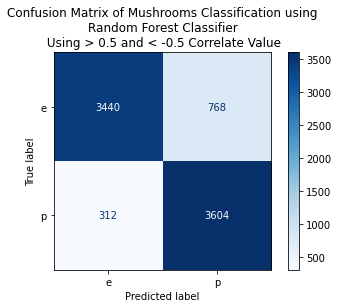

In [ ]:
#Plot the Confusion Matrix of > 0.5 or < -0.5 correlate value data

disp = ConfusionMatrixDisplay.from_estimator(
        model_corr,
        X_corr,
        y_corr,
        display_labels=le.classes_,
        cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix of Mushrooms Classification using'+ 
                   '\nRandom Forest Classifier\n Using > 0.5 and < -0.5'+
                   ' Correlate Value')

##### Now, we will try to train using using > 0.29 and < -0.29 Correlate to Class

In [ ]:
#Take the column that has correlate value > 0.29 or < -0.29

df_4 = df_2[correlate_column(0.29)]
df_4

,class,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,population
0,1,1,0,1,4,3,2,2,4,3
1,0,1,0,0,4,2,2,2,4,2
2,0,1,0,0,5,2,2,2,4,2
3,1,1,0,1,5,3,2,2,4,3
4,0,0,1,0,4,3,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,11,0,2,2,4,1
8120,0,0,0,0,11,0,2,2,4,4
8121,0,0,0,0,5,0,2,2,4,1
8122,1,0,0,1,0,0,2,1,0,4


In [ ]:
#Prepare the data that has correlate value > 0.29 or < -0.29

X_corr_1 = df_4.drop(['class'], axis=1)
X_corr_1

,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,population
0,1,0,1,4,3,2,2,4,3
1,1,0,0,4,2,2,2,4,2
2,1,0,0,5,2,2,2,4,2
3,1,0,1,5,3,2,2,4,3
4,0,1,0,4,3,2,2,0,0
...,...,...,...,...,...,...,...,...,...
8119,0,0,0,11,0,2,2,4,1
8120,0,0,0,11,0,2,2,4,4
8121,0,0,0,5,0,2,2,4,1
8122,0,0,1,0,0,2,1,0,4


In [ ]:
#Prepare the target

y_corr_1 = df_4['class']
y_corr_1

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [ ]:
#Split the data into 80% of train and 20% of test

X_train_corr_1, X_test_corr_1, y_train_corr_1, y_test_corr_1 = train_test_split(
    X_corr_1, y_corr_1, train_size=0.8, random_state=23)

In [ ]:
#Fit the model with prepared correlate data

model_corr_1 = RandomForestClassifier()
model_corr_1.fit(X_train_corr_1, y_train_corr_1)
X_train_corr_1_predicted = model_corr_1.predict(X_train_corr_1)
print('Accuracy score for train data is: ', 
      accuracy_score(y_train_corr_1, X_train_corr_1_predicted))

Accuracy score for train data is:  0.9933835974765348


In [ ]:
#Print accuracy score for the test correlate data

y_predicted_corr_1 = model_corr_1.predict(X_test_corr_1)
print('Accuracy score for test data is: ', accuracy_score(y_test_corr_1, 
                                                          y_predicted_corr_1))

Accuracy score for test data is:  0.9969230769230769


In [ ]:
#Print the Classification report of > 0.29 or < -0.29 correlate value data

print("Classification Report of > 0.29 or < -0.29 correlate value data:")
print('-'*65)
print(classification_report(y_test_corr_1, y_predicted_corr_1, 
                            target_names=le.classes_))

Classification Report of > 0.29 or < -0.29 correlate value data:
-----------------------------------------------------------------
              precision    recall  f1-score   support

           e       0.99      1.00      1.00       861
           p       1.00      0.99      1.00       764

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Text(0.5, 1.0, 'Confusion Matrix of Mushrooms Classification using\nRandom Forest Classifier\n Using > 0.29 and < -0.29 Correlate Value')

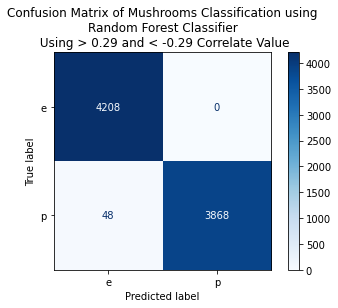

In [ ]:
#Plot the Confusion Matrix of > 0.29 or < -0.29 correlate value data

disp = ConfusionMatrixDisplay.from_estimator(
        model_corr_1,
        X_corr_1,
        y_corr_1,
        display_labels=le.classes_,
        cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix of Mushrooms Classification using'+ 
                   '\nRandom Forest Classifier\n Using > 0.29 and < -0.29'+
                   ' Correlate Value')

##### Now, we will try to train using using > 0.22 and < -0.22 Correlate to Class

In [ ]:
#Take the column that has correlate value > 0.22 or < -0.22

df_5 = df_2[correlate_column(0.22)]
df_5

,class,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,population
0,1,1,0,1,4,3,2,2,4,3
1,0,1,0,0,4,2,2,2,4,2
2,0,1,0,0,5,2,2,2,4,2
3,1,1,0,1,5,3,2,2,4,3
4,0,0,1,0,4,3,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,11,0,2,2,4,1
8120,0,0,0,0,11,0,2,2,4,4
8121,0,0,0,0,5,0,2,2,4,1
8122,1,0,0,1,0,0,2,1,0,4


In [ ]:
#Prepare the data that has correlate value > 0.22 or < -0.22

X_corr_2 = df_5.drop(['class'], axis=1)
X_corr_2

,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,population
0,1,0,1,4,3,2,2,4,3
1,1,0,0,4,2,2,2,4,2
2,1,0,0,5,2,2,2,4,2
3,1,0,1,5,3,2,2,4,3
4,0,1,0,4,3,2,2,0,0
...,...,...,...,...,...,...,...,...,...
8119,0,0,0,11,0,2,2,4,1
8120,0,0,0,11,0,2,2,4,4
8121,0,0,0,5,0,2,2,4,1
8122,0,0,1,0,0,2,1,0,4


In [ ]:
#Prepare the target

y_corr_2 = df_5['class']
y_corr_2

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [ ]:
#Split the data into 80% of train and 20% of test

X_train_corr_2, X_test_corr_2, y_train_corr_2, y_test_corr_2 = train_test_split(
    X_corr_2, y_corr_2, train_size=0.8, random_state=23)

In [ ]:
#Fit the model with prepared correlate data

model_corr_2 = RandomForestClassifier()
model_corr_2.fit(X_train_corr_2, y_train_corr_2)
X_train_corr_2_predicted = model_corr_2.predict(X_train_corr_2)
print('Accuracy score for train data is: ', 
      accuracy_score(y_train_corr_2, X_train_corr_2_predicted))

Accuracy score for train data is:  0.9933835974765348


In [ ]:
#Print accuracy score for the test correlate data

y_predicted_corr_2 = model_corr_2.predict(X_test_corr_2)
print('Accuracy score for test data is: ', accuracy_score(y_test_corr_2, 
                                                          y_predicted_corr_2))

Accuracy score for test data is:  0.9969230769230769


In [ ]:
#Print the Classification report of > 0.22 or < -0.22 correlate value data

print("Classification Report of > 0.22 or < -0.22 correlate value data:")
print('-'*65)
print(classification_report(y_test_corr_2, y_predicted_corr_2, 
                            target_names=le.classes_))

Classification Report of > 0.22 or < -0.22 correlate value data:
-----------------------------------------------------------------
              precision    recall  f1-score   support

           e       0.99      1.00      1.00       861
           p       1.00      0.99      1.00       764

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Text(0.5, 1.0, 'Confusion Matrix of Mushrooms Classification using\nRandom Forest Classifier\n Using > 0.22 and < -0.22 Correlate Value')

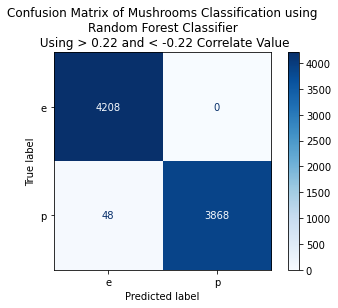

In [ ]:
#Plot the Confusion Matrix of > 0.22 or < -0.22 correlate value data

disp = ConfusionMatrixDisplay.from_estimator(
        model_corr_2,
        X_corr_2,
        y_corr_2,
        display_labels=le.classes_,
        cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix of Mushrooms Classification using'+ 
                   '\nRandom Forest Classifier\n Using > 0.22 and < -0.22'+
                   ' Correlate Value')

##### Now, we will try to train using using > 0.21 and < -0.21 Correlate to Class

In [ ]:
#Take the column that has correlate value > 0.21 or < -0.21

df_6 = df_2[correlate_column(0.21)]
df_6

,class,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-number,ring-type,population,habitat
0,1,1,0,1,4,3,2,2,1,4,3,5
1,0,1,0,0,4,2,2,2,1,4,2,1
2,0,1,0,0,5,2,2,2,1,4,2,3
3,1,1,0,1,5,3,2,2,1,4,3,5
4,0,0,1,0,4,3,2,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,11,0,2,2,1,4,1,2
8120,0,0,0,0,11,0,2,2,1,4,4,2
8121,0,0,0,0,5,0,2,2,1,4,1,2
8122,1,0,0,1,0,0,2,1,1,0,4,2


In [ ]:
#Prepare the data that has correlate value > 0.21 or < -0.21

X_corr_3 = df_6.drop(['class'], axis=1)
X_corr_3

,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-number,ring-type,population,habitat
0,1,0,1,4,3,2,2,1,4,3,5
1,1,0,0,4,2,2,2,1,4,2,1
2,1,0,0,5,2,2,2,1,4,2,3
3,1,0,1,5,3,2,2,1,4,3,5
4,0,1,0,4,3,2,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,11,0,2,2,1,4,1,2
8120,0,0,0,11,0,2,2,1,4,4,2
8121,0,0,0,5,0,2,2,1,4,1,2
8122,0,0,1,0,0,2,1,1,0,4,2


In [ ]:
#Prepare the target

y_corr_3 = df_6['class']
y_corr_3

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [ ]:
#Split the data into 80% of train and 20% of test

X_train_corr_3, X_test_corr_3, y_train_corr_3, y_test_corr_3 = train_test_split(
    X_corr_3, y_corr_3, train_size=0.8, random_state=23)

In [ ]:
#Fit the model with prepared correlate data

model_corr_3 = RandomForestClassifier()
model_corr_3.fit(X_train_corr_3, y_train_corr_3)
X_train_corr_3_predicted = model_corr_3.predict(X_train_corr_3)
print('Accuracy score for train data is: ', 
      accuracy_score(y_train_corr_3, X_train_corr_3_predicted))

Accuracy score for train data is:  1.0


In [ ]:
#Print accuracy score for the test correlate data

y_predicted_corr_3 = model_corr_3.predict(X_test_corr_3)
print('Accuracy score for test data is: ', accuracy_score(y_test_corr_3, 
                                                          y_predicted_corr_3))

Accuracy score for test data is:  1.0


In [ ]:
#Print the Classification report of > 0.21 or < -0.21 correlate value data

print("Classification Report of > 0.21 or < -0.21 correlate value data:")
print('-'*65)
print(classification_report(y_test_corr_3, y_predicted_corr_3, 
                            target_names=le.classes_))

Classification Report of > 0.21 or < -0.21 correlate value data:
-----------------------------------------------------------------
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       861
           p       1.00      1.00      1.00       764

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Text(0.5, 1.0, 'Confusion Matrix of Mushrooms Classification using\nRandom Forest Classifier\n Using > 0.21 and < -0.21 Correlate Value')

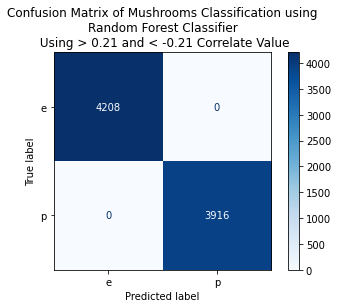

In [ ]:
#Plot the Confusion Matrix of > 0.21 or < -0.21 correlate value data

disp = ConfusionMatrixDisplay.from_estimator(
        model_corr_3,
        X_corr_3,
        y_corr_3,
        display_labels=le.classes_,
        cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix of Mushrooms Classification using'+ 
                   '\nRandom Forest Classifier\n Using > 0.21 and < -0.21'+
                   ' Correlate Value')

#### Conclusion!

In [ ]:
print('The features most indicative of a poisonous mushroom are: ')
for i in range(X_test_corr_3.columns.values.shape[0]):
  print(f"{i+1}. {X_test_corr_3.columns.values[i]}")
print('\nIt\'s because, when we used correlate values > 0.21 or < -0.21'+
      ' the accuracy is perfect,\nbut when we start to used correlate values'+
      ' > 0.22 or < -0.22, the accuracy is decreasing.')
print('\nIt\'s indicating that the features that have to correlate values'+
      '> 0.21 or < -0.21\nare the features most indicative of a'+
      ' poisonous mushroom ')

The features most indicative of a poisonous mushroom are: 
1. bruises
2. gill-spacing
3. gill-size
4. gill-color
5. stalk-root
6. stalk-surface-above-ring
7. stalk-surface-below-ring
8. ring-number
9. ring-type
10. population
11. habitat

It's because, when we used correlate values > 0.21 or < -0.21 the accuracy is perfect,
but when we start to used correlate values > 0.22 or < -0.22, the accuracy is decreasing.

It's indicating that the features that have to correlate values> 0.21 or < -0.21
are the features most indicative of a poisonous mushroom 
